In [2]:
#log_path = "data/monomer_chimeras.log"
#log_path = "data/runs2_monomers_mutations.log"
log_path = "data/monomers_mutations_with_isolates.log"

#MONOMER_NAME: [(MonomerId, mutations)...]
monomers_list = {}
with open(log_path) as fr:
    for line in fr:
        if "MonomerId" in line:
            monomerName = line.split()[0]
            monomerId = line.split("MonomerId= ")[-1].split()[0]
            mutationList = line.split('[ ')[-1].split(' ]')[0].split(', ')
            if mutationList[0] == '':
                mutationList = []
            
            for i in range(len(mutationList)):
                mutationList[i] = mutationList[i].split('(')[0]
            
            if monomerName not in monomers_list:
                monomers_list[monomerName] = []
            
            monomers_list[monomerName].append((monomerId, mutationList))
            
print(monomers_list)

{'S3CXH1L.5': [('0', ['14', '93', '128', '157']), ('11', ['99', '139', '140', '145', '162']), ('23', []), ('35', []), ('47', []), ('59', []), ('71', []), ('83', []), ('95', []), ('107', []), ('119', []), ('131', []), ('143', ['97']), ('155', []), ('167', ['98', '124']), ('179', []), ('191', ['98', '124']), ('203', []), ('215', []), ('227', ['98', '124']), ('239', []), ('251', []), ('263', ['98', '124']), ('275', []), ('287', []), ('299', []), ('311', []), ('323', []), ('335', ['153']), ('347', []), ('359', []), ('371', []), ('383', ['94']), ('395', []), ('407', []), ('419', []), ('431', ['160']), ('443', ['9', '94']), ('455', ['153']), ('467', ['22', '25']), ('479', []), ('491', ['22', '25']), ('503', ['148']), ('515', []), ('527', []), ('539', []), ('551', []), ('563', []), ('575', []), ('587', ['121']), ('599', []), ('611', ['121']), ('623', []), ('635', []), ('647', []), ('659', []), ('671', ['9']), ('683', []), ('695', []), ('707', ['9']), ('719', ['51']), ('731', ['9']), ('743', [

In [6]:
mem_color = {}

In [73]:
def get_hash(mut):
    if len(mut) > 1:
        return 0
    res = 0
    for i in range(len(mut)):
        if (int(mut[i]) > 0) and (int(mut[i]) < 1500):
            res += int(mut[i])
    return res
    
center_monomer = []
for monoName in monomers_list:
    cur_id = 0
    monoList = monomers_list[monoName]
    for frM_id in range(len(monoList)):
        if int(monoList[frM_id][0]) >= 7500 and int(monoList[frM_id][0]) <= 8500:
            if len(monoList[frM_id][1]) > 0:
                center_monomer.append(get_hash(monoList[frM_id][1]))


cur_id = 0
res_hash = {}

def get_color(mut_hash):
    import random
    if (mut_hash in mem_color):
        return mem_color[mut_hash]
    r = random.random()
    g = random.random()
    b = random.random()
    mem_color[mut_hash] = (r, g, b, 1.0) 
    return (r, g, b, 1.0)

def mut_hash(mut):
    global cur_id
    res = 0
    for i in range(len(mut)):
        if (int(mut[i]) > 0) and (int(mut[i]) < 1500):
            res = int(mut[i])
    if len(mut) > 1:
        return 0
    if res not in res_hash:
        res_hash[res] = cur_id
        cur_id += 1
    return res_hash[res]

#6500--8500
xpos = []
ypos = []
close = []
colors = []

for monoName in monomers_list:
    cur_id = 0
    monoList = monomers_list[monoName]
    for frM_id in range(len(monoList)):
        if int(monoList[frM_id][0]) >= 0*12 and int(monoList[frM_id][0]) <= 100*12:
            if len(monoList[frM_id][1]) > 0 and get_hash(monoList[frM_id][1]) > 0:
                #if get_hash(monoList[frM_id][1]) in center_monomer:
                    ypos.append(int(monoName.split('.')[-1]))
                    xpos.append(int(monoList[frM_id][0]) // 12)
                    close.append(get_hash(monoList[frM_id][1]))
                    colors.append(get_color(get_hash(monoList[frM_id][1])))
                    print(xpos[-1], ypos[-1], colors[-1])

11 5 (0.6631982593468209, 0.5111545742558338, 0.11531111090828694, 1.0)
27 5 (0.38559518473225696, 0.6464640015845459, 0.5315441281309639, 1.0)
31 5 (0.7200088399720485, 0.4794060146224306, 0.3933704438799698, 1.0)
35 5 (0.8295906747876307, 0.6798774159573984, 0.9872502015765142, 1.0)
37 5 (0.38559518473225696, 0.6464640015845459, 0.5315441281309639, 1.0)
41 5 (0.6391198263891553, 0.9797291842276713, 0.07927303294917609, 1.0)
48 5 (0.7299145740787649, 0.4699821984172432, 0.5635416984148018, 1.0)
50 5 (0.7299145740787649, 0.4699821984172432, 0.5635416984148018, 1.0)
55 5 (0.7013268726488593, 0.5839970223338966, 0.10513149790487286, 1.0)
58 5 (0.7013268726488593, 0.5839970223338966, 0.10513149790487286, 1.0)
59 5 (0.667614853043733, 0.21512983028945232, 0.6808405283345076, 1.0)
60 5 (0.7013268726488593, 0.5839970223338966, 0.10513149790487286, 1.0)
61 5 (0.2600729882869315, 0.6635245969615462, 0.43840555691010485, 1.0)
62 5 (0.2600729882869315, 0.6635245969615462, 0.43840555691010485, 1.

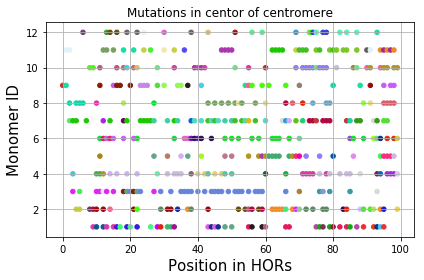

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

#close=[i for i in range(1000)]
#xpos=close
#ypos=close

fig, ax = plt.subplots()
ax.scatter(xpos, ypos, color=colors, s=20, alpha=1)

ax.set_ylabel("Monomer ID", fontsize=15)
ax.set_xlabel("Position in HORs", fontsize=15)
ax.set_title('Mutations in centor of centromere')

ax.grid(True)
fig.tight_layout()

plt.show()